In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Data

testpathzip = "/content/drive/MyDrive/Datasets/ArrythmiaData/mitbih_test.csv.zip"


trainpathzip = "/content/drive/MyDrive/Datasets/ArrythmiaData/mitbih_train.csv.zip"

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/ArrythmiaData/mitbih_test.csv.zip"

Archive:  /content/drive/MyDrive/Datasets/ArrythmiaData/mitbih_test.csv.zip
  inflating: mitbih_test.csv         


In [ ]:
!unzip "/content/drive/MyDrive/Datasets/ArrythmiaData/mitbih_train.csv.zip"

Archive:  /content/drive/MyDrive/Datasets/ArrythmiaData/mitbih_train.csv.zip
  inflating: mitbih_train.csv        


In [ ]:
train_data = pd.read_csv('/content/mitbih_train.csv', header = None)
test_data = pd.read_csv('/content/mitbih_test.csv', header = None)

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('infromation about train data')
train_data.info()
print('\ninfromation about test data')
test_data.info()

infromation about train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB

 infromation about test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


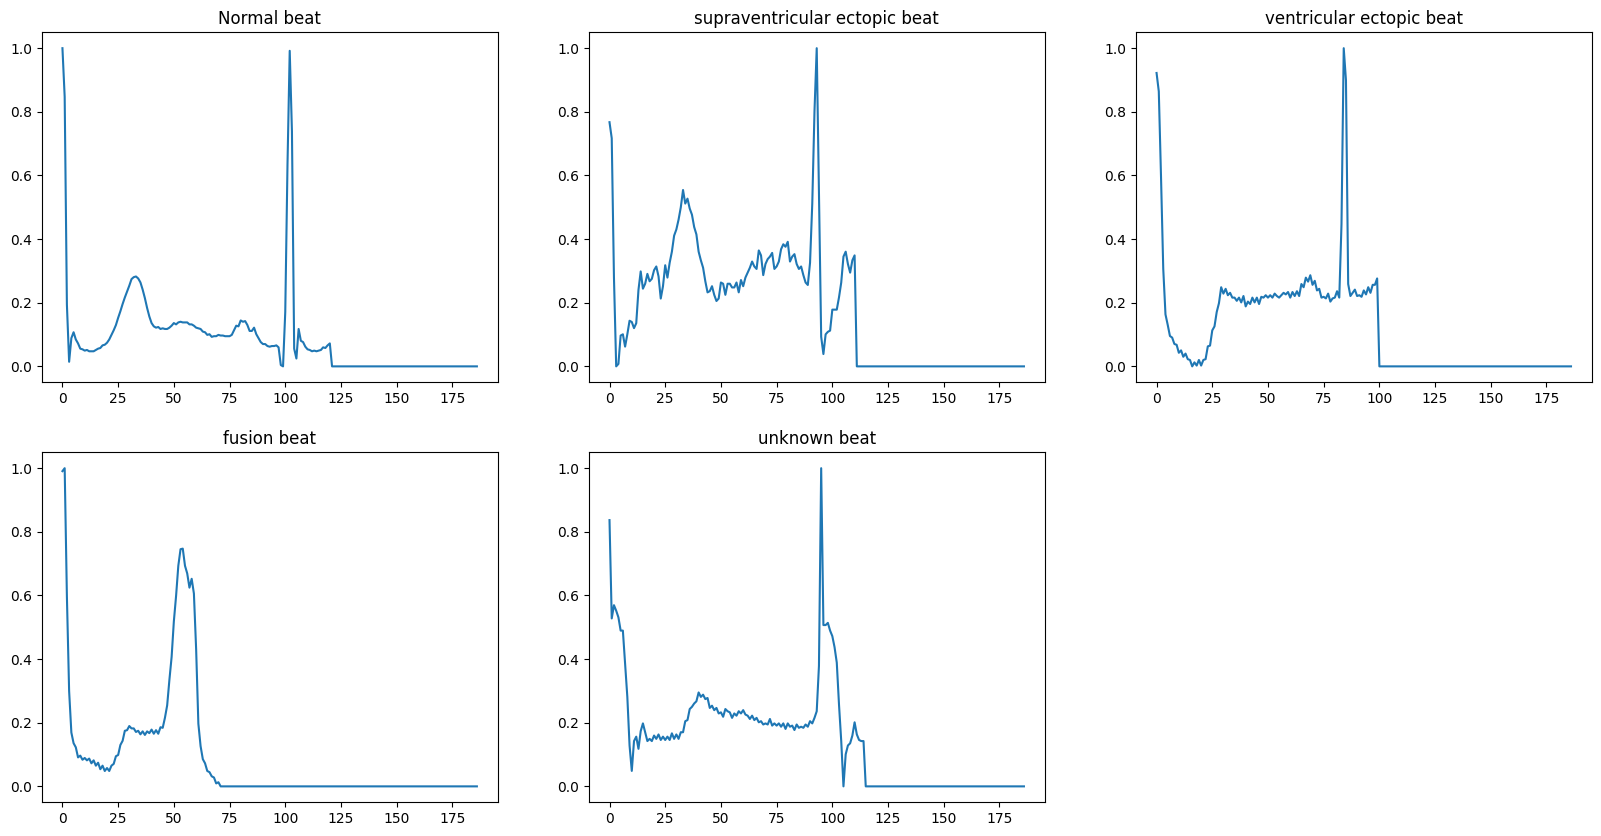

In [ ]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
plt.plot(range(0, 187), (train_data.loc[train_data[187] == 0]).sample(1).iloc[:, :-1].values[0])
plt.title('Normal beat')

plt.subplot(2, 3, 2)
plt.plot((train_data.loc[train_data[187] == 1]).sample(1).iloc[:, :-1].values[0])
plt.title('supraventricular ectopic beat')

plt.subplot(2, 3, 3)
plt.plot((train_data.loc[train_data[187] == 2]).sample(1).iloc[:, :-1].values[0])
plt.title('ventricular ectopic beat')

plt.subplot(2, 3, 4)
plt.plot((train_data.loc[train_data[187] == 3]).sample(1).iloc[:, :-1].values[0])
plt.title ('fusion beat')

plt.subplot(2, 3, 5)
plt.plot((train_data.loc[train_data[187] == 4]).sample(1).iloc[:, :-1].values[0])
plt.title('unknown beat')

plt.show()

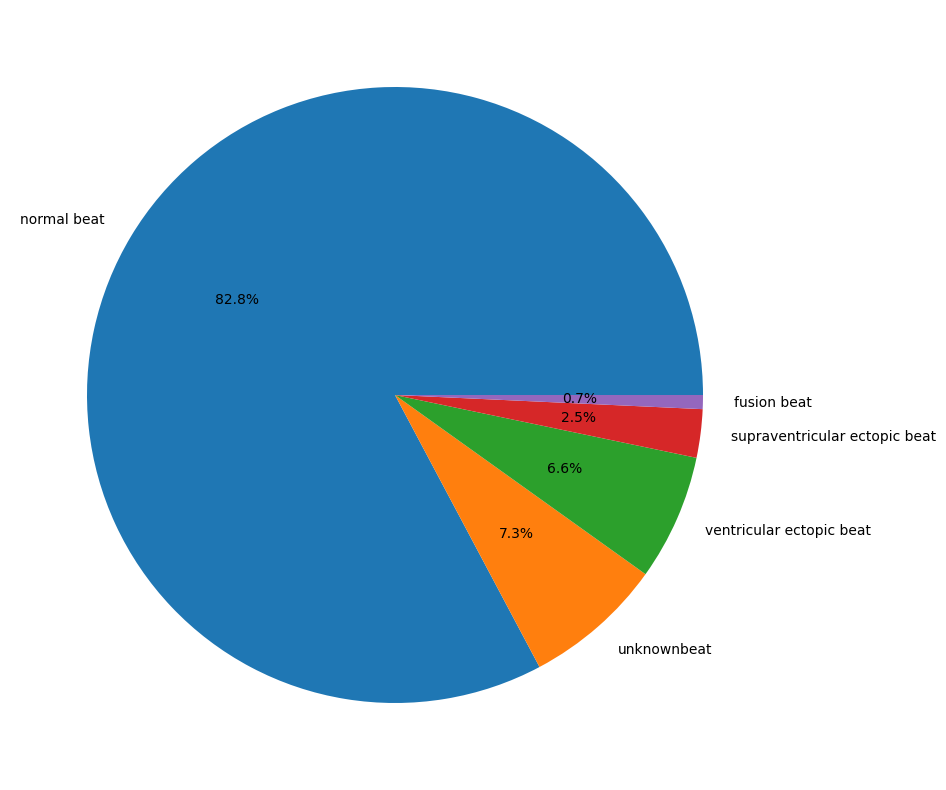

In [ ]:
class_names = ['normal beat', 'unknownbeat', 'ventricular ectopic beat', 'supraventricular ectopic beat', 'fusion beat']
plt.figure(figsize = (10, 10))
plt.pie(train_data[187].value_counts().values, labels = class_names, autopct = '%1.1f%%')
plt.show()

In [ ]:
class_names, len(class_names)

(['normal beat',
  'unknownbeat',
  'ventricular ectopic beat',
  'supraventricular ectopic beat',
  'fusion beat'],
 5)

In [ ]:
train_data[187].unique() #

array([0., 1., 2., 3., 4.])

In [ ]:
array = tf.one_hot(train_data[187].unique(), depth = 5)
array #

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [ ]:
X = train_data.drop([187], axis = 1)
y = train_data[187]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [ ]:
X.shape, y.shape

((87554, 187), (87554,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((70043, 187), (70043,), (17511, 187), (17511,))

In [ ]:
X_train.max(), X_train.min()

(0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 182    1.0
 183    1.0
 184    1.0
 185    1.0
 186    1.0
 Length: 187, dtype: float64,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 182    0.0
 183    0.0
 184    0.0
 185    0.0
 186    0.0
 Length: 187, dtype: float64)

In [ ]:
y_train = tf.one_hot(y_train, depth = len(class_names))
y_val = tf.one_hot(y_val, depth = len(class_names))

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU, Conv1D

#### Model Architecture :

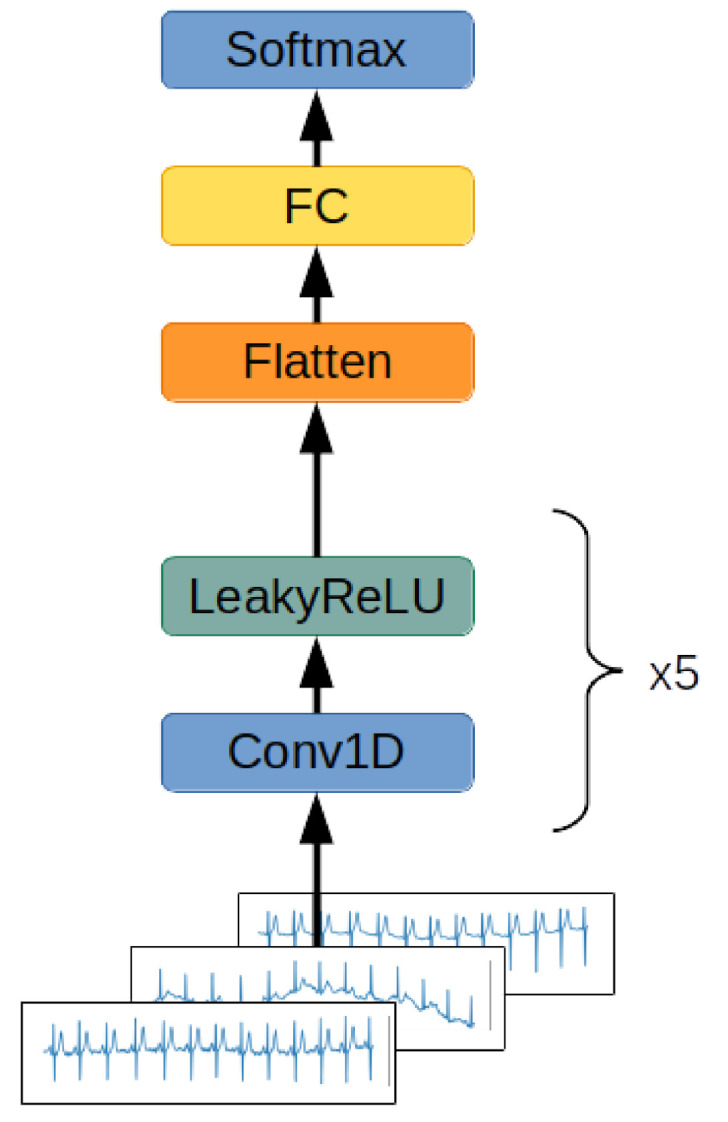


In [ ]:
X_train.shape

(70043, 187)

In [ ]:
X_train = np.expand_dims(X_train, axis = 2)
X_train.shape

(70043, 187, 1)

In [ ]:
y_train.shape

TensorShape([70043, 5])

In [ ]:
X_val = np.expand_dims(X_val, axis = 2)
X_val.shape

(17511, 187, 1)

In [ ]:
y_val.shape

TensorShape([17511, 5])

In [ ]:
X_train[0].shape

(187, 1)

In [ ]:
# model creation based on given architecture and assumed hyperparameters
model = Sequential([
    Conv1D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', input_shape = (187, 1)),
    LeakyReLU(alpha = 0.2),

    Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'valid'),
    LeakyReLU(alpha = 0.2),

    Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = 'valid'),
    LeakyReLU(alpha = 0.2),

    Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = 'valid'),
    LeakyReLU(alpha = 0.2),

    Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = 'valid'),
    LeakyReLU(alpha = 0.2),

    Flatten(),
    Dense(units = len(class_names), activation = 'softmax')
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 16)           64        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 185, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 183, 32)           1568      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 183, 32)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 181, 64)           6208      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 181, 64)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 179, 128)          2

In [ ]:
from keras.utils import plot_model

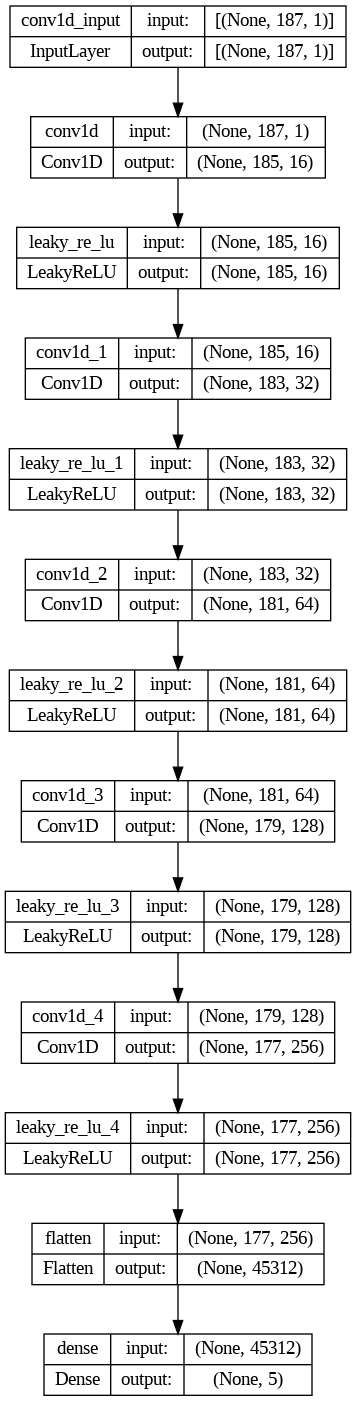

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
# training model
history = model.fit(X_train,
                    y_train,
                    epochs = 8,
                    batch_size = 128,
                    validation_data = [X_val, y_val]
                    )

Epoch 1/8
548/548 [==============================] - 19s 14ms/step - loss: 0.2555 - accuracy: 0.9303 - val_loss: 0.1623 - val_accuracy: 0.9539
Epoch 2/8
548/548 [==============================] - 7s 13ms/step - loss: 0.1361 - accuracy: 0.9623 - val_loss: 0.1350 - val_accuracy: 0.9668
Epoch 3/8
548/548 [==============================] - 7s 13ms/step - loss: 0.1085 - accuracy: 0.9702 - val_loss: 0.1096 - val_accuracy: 0.9700
Epoch 4/8
548/548 [==============================] - 7s 12ms/step - loss: 0.0933 - accuracy: 0.9740 - val_loss: 0.1015 - val_accuracy: 0.9712
Epoch 5/8
548/548 [==============================] - 8s 14ms/step - loss: 0.0829 - accuracy: 0.9763 - val_loss: 0.0903 - val_accuracy: 0.9737
Epoch 6/8
548/548 [==============================] - 7s 13ms/step - loss: 0.0759 - accuracy: 0.9785 - val_loss: 0.0856 - val_accuracy: 0.9764
Epoch 7/8
548/548 [==============================] - 7s 13ms/step - loss: 0.0703 - accuracy: 0.9797 - val_loss: 0.0869 - val_accuracy: 0.9765
Epoch

In [ ]:
X_test = test_data.drop([187], axis = 1)
y_test = test_data[187]

In [ ]:
X_test = np.expand_dims(X_test, axis = 2)
X_test.shape

(21892, 187, 1)

In [ ]:
y_test = tf.one_hot(y_test, depth = 5)
y_test.shape

TensorShape([21892, 5])

In [ ]:
model.evaluate(X_test, y_test)

685/685 [==============================] - 4s 5ms/step - loss: 0.0987 - accuracy: 0.9754


[0.09870412945747375, 0.9754248261451721]

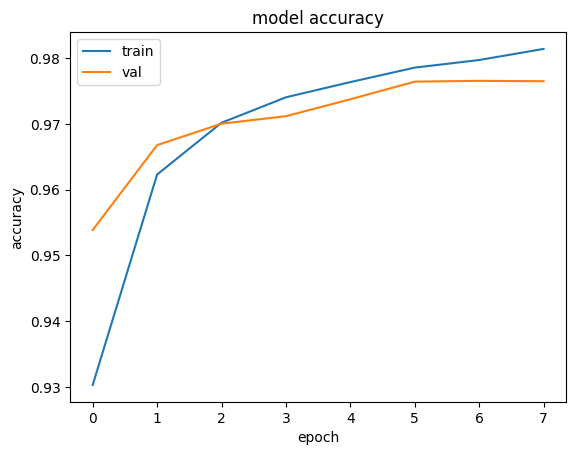

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

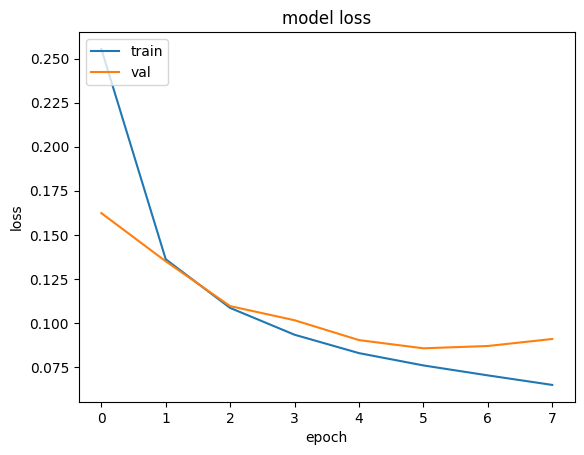

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
y_probs = model.predict(X_test)
y_probs[:20]

685/685 [==============================] - 2s 3ms/step


array([[9.9991560e-01, 8.3513005e-05, 5.7005312e-09, 8.8578895e-07,
        4.0846707e-08],
       [9.9973720e-01, 2.1368421e-04, 4.1517753e-05, 7.4380396e-06,
        1.3721206e-07],
       [9.9514800e-01, 2.0604040e-03, 2.4613518e-08, 3.3470375e-09,
        2.7916336e-03],
       [9.9340492e-01, 2.0377628e-04, 5.4989541e-03, 2.2270911e-05,
        8.7006344e-04],
       [9.2485076e-01, 2.5178399e-03, 6.7745537e-02, 2.0414031e-04,
        4.6818401e-03],
       [9.9999845e-01, 4.4744746e-07, 8.4541789e-08, 9.8211945e-07,
        8.2862095e-10],
       [9.9997270e-01, 1.7853532e-05, 1.6005573e-07, 9.2655682e-06,
        1.6060785e-09],
       [9.9944955e-01, 3.3400778e-04, 1.7321554e-04, 2.1243555e-07,
        4.2969470e-05],
       [9.9999714e-01, 2.8171223e-06, 4.9600999e-08, 1.1715916e-10,
        9.3769481e-10],
       [9.9978417e-01, 2.1246362e-04, 3.3574254e-06, 1.4653704e-08,
        7.2573062e-13],
       [9.9997485e-01, 1.8270977e-05, 3.5836841e-08, 6.9037146e-06,
        2.20

In [ ]:
y_pred = tf.argmax(y_probs, axis = 1)
y_pred[:10]

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
y_pred

<tf.Tensor: shape=(21892,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4])>

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_pred = y_pred, y_true = tf.argmax(y_test, axis = 1))

In [ ]:
cm

array([[18000,    21,    50,    30,    17],
       [  205,   342,     7,     2,     0],
       [   77,     4,  1322,    40,     5],
       [   34,     0,     9,   119,     0],
       [   31,     0,     6,     0,  1571]])

In [ ]:
print(classification_report(y_pred = y_pred, y_true = tf.argmax(y_test, axis = 1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.93      0.62      0.74       556
           2       0.95      0.91      0.93      1448
           3       0.62      0.73      0.67       162
           4       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.89      0.85      0.86     21892
weighted avg       0.98      0.98      0.97     21892

